In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-assistants-with-gemma/submission_categories.txt
/kaggle/input/data-assistants-with-gemma/submission_instructions.txt
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/assets/tokenizer/vocabulary.spm
/kaggle/input/question-answer/Dataset_Python_Question_Answer.csv


In [2]:
import time
from time import gmtime, strftime
start = time.time()
print("GMT : ",time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))

GMT :  Sat, 30 Mar 2024 04:50:58 PM GMT


In [3]:
import sklearn
print(sklearn.__version__)
!python --version

1.2.2
Python 3.10.13


In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('/kaggle/input/question-answer/Dataset_Python_Question_Answer.csv')

In [6]:
dataset.shape

(419, 2)

In [7]:
pd.set_option("display.max_colwidth", 3000)

In [8]:
dataset.sample(5)

,Question,Answer
248,How can you use the threading module in Python to run multiple functions simultaneously?**,"['Sure, here is a detailed explanation of how to use the threading module in Python to run multiple functions simultaneously:', '**1. Import the threading Module:**', '```python', 'import threading', '```', 'This line imports the `threading` module, which provides functions and classes for managing multiple threads of execution in a single process.', '**2. Create a Thread Class:**', '```python', 'class Thread(threading.Thread):', ' def __init__(self, thread_id, function):', ' threading.Thread.__init__(self)', ' self.thread_id = thread_id', ' self.function = function', ' def run(self):', ' # Place your function logic here', ' print(f""Thread {self.thread_id} running function."")', '```', 'This class inherits from the `threading.Thread` class. Each thread object created from the `Thread` class inherits its own thread ID and a reference to the `function` variable.', '**3. Define Multiple Functions:**', '```python', 'function1 = lambda: print(""Function 1 is running."")', 'function2 = lambda: print(""Function 2 is running."")', '```', 'In this example, I define two functions, `function1` and `function2`, which execute the same code but with different outputs.', '**4. Create and Start Threads:**', '```python', 'thread1 = Thread(target=function1)', 'thread2 = Thread(target=function2)', 'thread1.start()', 'thread2.start()', '```', 'This code creates two threads and starts them running. The `target` parameter of the `Thread` constructor specifies a lambda function that defines the code to execute in that thread.', '**5. Join Threads (Optional):**', '```python', '# Wait for threads to finish before continuing', 'thread1.join()', 'thread2.join()', '```', 'If you want to wait for all threads to finish before continuing execution, you can use the `join()` method on each thread. This will block the main thread until the thread reaches the `join()` method.', '**6. Run Multiple Threads in a For Loop:**', '```python', 'threads = []', 'for i in range(10):', ' thread = Thread(target=lambda: print(f""Thread {i} is running""))', ' thread.start()', ' threads.append(thread)', 'for thread in threads:', ' thread.join()', '```', 'This example creates 10 threads that all print the message ""Thread X is running."" The `target` parameter of each thread is a lambda function that defines the code to execute in that thread. The `start()` method is used to start each thread, and the `join()` method is used to wait for all threads to finish before continuing execution.', '**Note:**', '* Threads have their own stack, so they are isolated from each other.', '* Each thread has its own set of global variables.', '* You can pass arguments to threads when you create them.', '* Threads are reusable. You can create multiple threads from a single thread object.']"
313,What are the different versions of Python?,"['**Python has several versions, including:**', '1. **Python 2**: This is the most popular version currently in use, and is known for its stability and compatibility with other libraries and frameworks.', '2. **Python 3**: This version is designed to be more compatible with other modern languages and is the basis for the current version of the language. It also includes some features that were removed from Python 2, such as support for Unicode characters and the `async` keyword.', '3. **Alpha versions of Python**: These are experimental and are released periodically by the Python development team. They are used to explore new features and improve the language.', '**Additionally, there are also versions for specific platforms and distributions:**', '* **Python for Windows**', '* **Python for macOS**', '* **Python for Linux**', '* **Scientific Python (spython)**', '* **NumPy and Matplotlib for scientific computing**', '* **Google Colab**', 'It is important to choose the right version of Python for your specific needs and project requirements.']"
217,Ho

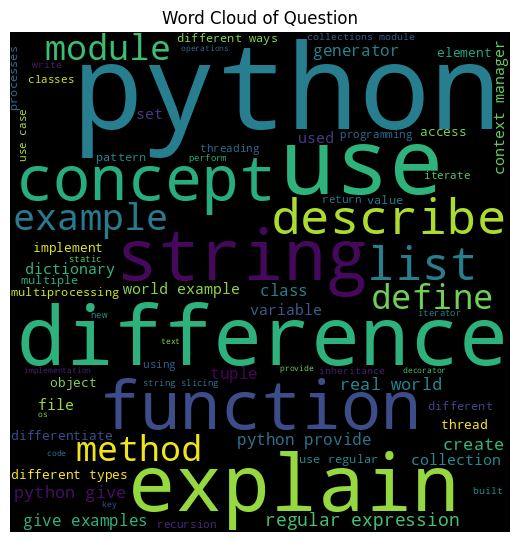

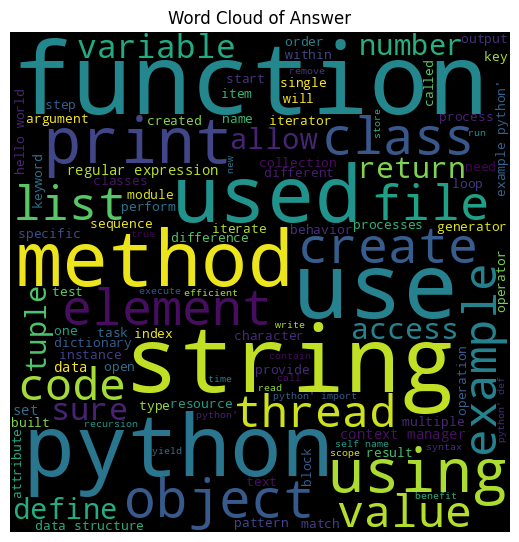

In [9]:
comment_words = ''
stopwords = set(STOPWORDS)
#print(stopwords)

columns=list(dataset)
for col in columns:
    for val in dataset[col]:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()     
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    stopwords = stopwords,      
                    min_font_size = 8).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    title="Word Cloud of " + col
    plt.title(title)
    plt.show()

In [10]:
%%capture
!pip install -U keras-nlp
!pip install -q -U keras>=3

In [11]:
%%capture
# The %%capture magic command is used to suppress the output of the cell.

import pandas as pd
# Importing the pandas library as pd. Pandas is a powerful data manipulation and analysis library.

from tqdm.notebook import tqdm
# Importing tqdm from the notebook submodule of the tqdm library. tqdm is used for creating progress bars in loops.

tqdm.pandas() 
# Configuring tqdm to work with pandas, allowing progress bars for operations on pandas objects.

import numpy as np
# Importing the numpy library as np. Numpy is a fundamental package for scientific computing in Python.

import re
# Importing the re module. re is Python's regular expression module, used for pattern matching in strings.

import matplotlib.pyplot as plt
# Importing the pyplot module from the matplotlib library as plt. Matplotlib is a plotting library for Python.

import keras
# Importing the keras library. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

import keras_nlp
# Importing the keras_nlp library. This likely contains additional tools or utilities specific to natural language processing tasks in Keras.

from IPython.display import display, Markdown
# Importing display and Markdown classes from IPython.display module. This allows displaying rich content and Markdown text in the notebook.

2024-03-30 16:51:42.381955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 16:51:42.382076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 16:51:42.543306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
import os
# Importing the os module. This module provides a way to interact with the operating system.

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow"
# Setting the environment variable "KERAS_BACKEND" to "jax". This specifies the backend for Keras, which determines the library used for tensor operations and training neural networks. Options include "jax", "torch", or "tensorflow".

# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"
# Setting the environment variable "XLA_PYTHON_CLIENT_MEM_FRACTION" to "1.00". This is specific to the JAX backend and is used to configure the memory allocation fraction for XLA (Accelerated Linear Algebra) computations in JAX. This can help avoid memory fragmentation issues.

In [13]:
%%capture
# The %%capture magic command is used to suppress the output of the cell.

#gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
# Creating a GemmaCausalLM (language model) instance using the "gemma_2b_en" preset. This line is commented out.

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")
# Creating a GemmaCausalLM (language model) instance using the "gemma_instruct_2b_en" preset.

gemma_lm.summary()
# Generating a summary of the GemmaCausalLM model.

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


In [14]:
gemma_lm.compile()

In [15]:
template = "Instruction:\n{instruction}\n\nResponse:\n{response}"

In [16]:
prompt = template.format(
    instruction="How many Keywords are there in Python programming language?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

I0000 00:00:1711817642.446818      18 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-30 16:54:02.493552: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Instruction:
How many Keywords are there in Python programming language?

Response:
The number of keywords in the Python language is 35.

Sure, here's a list of keywords in Python:

1. if
2. else
3. else
4. for
5. in
6. if
7. else
8. raise
9. while
10. continue
11. break
12. else
13. return
14. class
15. module
16. def
17. and
18. or
19. not
20. None
21. True
22. False
23. print
24. exit
25. lambda
26. function
27. del
28. class
29. def
30. if
31. try
32. except
33. raise
34. else
35. finally


In [17]:
"""import keyword

print(keyword.kwlist)"""
#['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']

'import keyword\n\nprint(keyword.kwlist)'

In [18]:
prompt = template.format(
    instruction="What are the key features of Python?.",
    response="",
)
print(gemma_lm.generate(prompt, max_length=512))

Instruction:
What are the key features of Python?.

Response:
**Key Features of Python:**

**1. Dynamic Typing:**
- Python dynamically infers the type of a variable based on the data assigned to it.
- This eliminates the need for explicit type declarations and makes code more flexible.

**2. Conciseness:**
- Python uses simple and clear syntax, with minimal punctuation and keywords.
- This makes it easier to read and maintain code, especially for large projects.

**3. Interpreted Language:**
- Python is an interpreted language, meaning the code is executed line by line during runtime.
- This allows for faster execution compared to compiled languages like C++.

**4. Object-Oriented Programming:**
- Python supports object-oriented programming principles, with concepts like classes, objects, and inheritance.
- This allows developers to create reusable and modular code.

**5. Libraries and Modules:**
- Python has a vast collection of libraries and modules that extend its functionality.
- T

In [19]:
prompt = template.format(
    instruction="What is tuple in Python?.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
What is tuple in Python?.

Response:
A tuple is a collection of ordered elements in Python. It is a type of iterable, which means that it can be iterated over. Tuples are created using parentheses, with the first element on the left and the last element on the right. For example:

```python
tuple1 = (1, 2, 3, 4, 5)
```

Tuples can contain different data types, including integers, floats, strings, and even other tuples.

**Key features of tuples:** 
 
- Ordered elements 
- Immutable
- iterable 
- Supports tuple literals


Here are some examples of tuple operations:

- **Membership:** You can check if a specific element is present in a tuple using the `in` operator. For example:

```python
tuple1 = (1, 2, 3, 4, 5)
element_to_search = 3

if element_to_search in tuple1:
    print("Element found in tuple1.")
```

- **Slicing:** You can access specific elements in a tuple using slicing. For example:

```python
tuple1 = (1, 2, 3, 4, 5)
first_element = tuple1[0]

print(f"First ele

In [20]:
# Enable LoRA for the model and set the LoRA rank to 4/8/12/16/...
# This comment describes the purpose of the following code: enabling LoRA (Local Rank Adaptation) for the model and setting the LoRA rank to one of the specified values (4, 8, 12, or 16).

gemma_lm.backbone.enable_lora(rank=4)
# Enabling LoRA for the backbone of the GemmaCausalLM model with a specified rank of 4. LoRA is a technique used for adapting the local ranks of layers in a neural network.

gemma_lm.summary()
# Generating a summary of the GemmaCausalLM model after enabling LoRA. This summary provides information about the architecture and parameters of the model.

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,507,536,384 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,507,536,384 (9.34 GB)

 Trainable params: 1,363,968 (5.20 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

In [21]:
gemma_lm.preprocessor.sequence_length = 128

In [22]:
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-6,
    weight_decay=0.01,
)

In [23]:
#join dataset columns
output=pd.DataFrame(columns=["QA"])
output=dataset["Question"]+dataset["Answer"]

In [24]:
# Exclude layernorm and bias terms from decay.
# This comment describes the purpose of the following code: to exclude layernorm and bias terms from weight decay during optimization.

# optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])
# This line of code is commented out and seems to be intended to configure the optimizer to exclude certain variables (specifically, "bias" and "scale") from weight decay. However, it is not directly executed in this snippet.

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
# Compiling the GemmaCausalLM model with a specified loss function, optimizer, and metrics. This prepares the model for training.

gemma_lm.fit(output, epochs=1, batch_size=1)
# Training the GemmaCausalLM model for one epoch using the provided training data (output). The batch size is set to 1, indicating that each iteration will process a single example.

419/419 ━━━━━━━━━━━━━━━━━━━━ 7613s 18s/step - loss: 2.2553 - sparse_categorical_accuracy: 0.6824


In [25]:
prompt = template.format(
    instruction="What are the key features of Python?.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
What are the key features of Python?.

Response:
Sure, here are the key features of Python:

**1. High-Level:** Python is designed at a high level, making it easier to learn and use than lower-level languages like C or C++. This means that you can write clear and concise code without worrying about low-level details such as memory management and data structures.

**2. Dynamic Typing:** Python is dynamically typed, which means that you do not need to explicitly declare the data type of each variable before you use it. This allows you to change the data type of a variable on the fly, which can make your code more flexible.

**3. Built-in Data Structures:** Python includes a wide range of built-in data structures, including lists, tuples, dictionaries, and sets. These data structures provide you with efficient and convenient ways to store and manipulate data.

**4. Object-Oriented:** Python is an object-oriented language, which means that you can create objects that represent

In [26]:
prompt = template.format(
    instruction=" What is PEP 8 in python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
 What is PEP 8 in python?

Response:
PEP 8 is a style guide for Python that provides guidelines for formatting code, documenting code, and using libraries and modules according to the Python community. PEP 8 is often used when writing Python code to ensure that code is clear, consistent, and readable for other programmers. It is a recommended style for Python and is supported by many IDEs and other tools.


In [27]:
prompt = template.format(
    instruction="Please generate the list of all Keywords of Python language.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Please generate the list of all Keywords of Python language.

Response:
| Keyword | Description |
|---|---|
| if | Conditional statement |
| else | Alternative of an if statement |
| elif | Alternative of an if/else statement |
| print | Prints a message |
| string | Deals with string data |
| integer | Represents whole numbers |
| float | Represents floating-point numbers |
| bool | Represents True or False values |
| len | Returns the length of a string |
| join | Combines strings together |
| slice | Subset of a list |
| range | Creates a sequence of numbers |
| function | Reusable block of code |
| class | Defines a blueprint for creating objects |
| object | An instance of a class |
| module | Contains code that can be reused |
| package | Group of related modules |


In [28]:
prompt = template.format(
    instruction="Is Python a strong or weak language?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Is Python a strong or weak language?

Response:
Python is generally considered a **moderate language** in terms of strength. It is neither as verbose or complex as some programming languages like Java or C++, but it is still capable of achieving complex tasks and applications.


In [29]:
prompt = template.format(
    instruction="Explain the concept of metaprogramming in Python.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Explain the concept of metaprogramming in Python.

Response:
Sure, here is a detailed explanation of the concept of metaprogramming in Python:

**What is Metaprogramming?**

Metaprogramming is a programming technique that allows you to create programs that create other programs. This means that you can write code that will generate code, allowing you to build your software on a foundation of itself.

**How Metaprogramming Works in Python?**

In Python, metaprogramming is achieved using decorators. Decorators allow you to modify the behavior of a function or class dynamically. This means that you can dynamically change the functionality of a function or class without having to rewrite the entire code from scratch.

**Example of Metaprogramming in Python**

```python
def meta_function(func):
    def wrapper(*args, **kwargs):
        print("Calling function:", func.__name__)
        result = func(*args, **kwargs)
        print("Function returned:", result)
        return resu

In [30]:
prompt = template.format(
    instruction="How do you use `None` in Python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
How do you use `None` in Python?

Response:
Sure. Here's a detailed explanation of how to use `None` in Python:

**1. Declaration:**
- `None` is a special keyword in Python that represents **nothing**.
- It is used to indicate that a variable or function does not have any associated value.

**2. Variable Assignment:**
- `None` can be assigned to a variable to represent a missing value.
- For example: `my_variable = None`

**3. Comparison Operator:**
- `None` can be compared to other values using the `==` and `!=` operators.
- `None == None` is `True`, while `None != None` is `False`

**4. Data Types:**
- `None` is considered a "null" value in all data types.
- It is equivalent to `0` (for numeric types), `''` (for string types), and `False` (for boolean types).

**5. Nested None:**
- In nested structures, `None` can be used to represent the absence of a value at a specific position.
- For example:
```python
nested_list = [[None, None, None], [None, None, None]]
```

**6. S

In [31]:
prompt = template.format(
    instruction="How do you handle exceptions in Python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
How do you handle exceptions in Python?

Response:
**Exception Handling in Python**

**1. Using the `except` Keyword:**

- The `except` keyword is used to specify the exception type or types that the code should handle.
- The `except` block contains the code to be executed if an exception of the specified type is caught.
- You can use multiple `except` blocks to handle different types of exceptions.

```python
try:
    # Code to be executed
except ArithmeticError:
    print("Division by zero is not allowed.")
except ZeroDivisionError:
    print("Cannot divide by zero.")
except Exception as e:
    print(f"An error occurred: {e}")
```

**2. Using the `try` and `finally` Blocks:**

- The `try` block contains the code that should be executed normally.
- The `finally` block contains code to be executed regardless of whether an exception is raised.
- This allows you to perform some cleanup or logging even if an exception occurs.

```python
try:
    # Code to be executed
except E

In [32]:
prompt = template.format(
    instruction="Explain the concept of recursion in Python with an example.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=1024))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Explain the concept of recursion in Python with an example.

Response:
Sure. Recursion is a programming technique that allows a program to execute itself from within the code itself. It allows a function or method to call itself with a modified version of its input, until a base case is reached.

**Example:**

```python
def factorial(n):
    # Base condition: if n is 0, return 1.
    if n == 0:
        return 1

    # Recursive step: calculate the factorial of n by multiplying n with the factorial of (n-1).
    else:
        return n * factorial(n-1)


# Call the factorial function with different values of n.
print(factorial(5))  # Output: 120
```

**In this example:**
1. The `factorial` function takes an integer `n` as input.
2. If `n` is `0`, it returns 1. This is the base case.
3. If `n` is not `0`, it calculates the factorial of `n` by multiplying `n` with the factorial of `n-1`.
4. The function calls itself recursively with the parameter `n-1` until it reaches the bas

In [33]:
prompt = template.format(
    instruction="Describe the differences between `collections` and `OrderedDict",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Describe the differences between `collections` and `OrderedDict

Response:
Sure, here's the difference between collections and OrderedDict.

* **collections**: A collection is a mutable data structure in Python that can contain elements of different types. It is a built-in class, and it has many methods and properties that allow you to manipulate its elements.
* **OrderedDict**: An OrderedDict is a type of dictionary that preserves the order of its elements in which they were inserted. It is also a built-in class, and it has many methods and properties that allow you to manipulate its elements.

Here's a table summarizing the differences between collections and OrderedDict:

| Feature | Collection | OrderedDict |
|---|---|---|
| Type | Mutable data structure | Mutable dictionary |
| Elements | Elements of different types | Key-value pairs |
| Order | Not maintained | Preserves order of insertion |
| Methods | Many methods for manipulating elements | Many methods for manipu

In [34]:
prompt = template.format(
    instruction="What are the differences between `def` and `function` in python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
What are the differences between `def` and `function` in python?

Response:
Sure. Here is a comparison between `def` and `function` in Python:

**`def`**:

* `def` is a keyword used to define a new function.
* It takes a name as its first parameter and then a list of parameters, separated by commas.
* The function definition ends with a colon.
* The `def` keyword followed by the parameters is used to declare the function.

**`function`**:

* `function` is a built-in function in Python.
* It takes a single parameter, which is the name of the function.
* The `function` keyword is used to define the function.
* It can be used directly without the `def` keyword.

**Example:**

```python
# Define a function using def
def my_function(x):
    return x + 10

# Define a function directly (same as above)
function_name = my_function

# Call the function
result = my_function(5)

print(result)  # Output: 15
```

**Key Differences**:

| Feature | `def` | `function` |
|---|---|---|
| Usa

In [35]:
end = time.time()
# Capturing the current time after the execution of the program or a specific portion of the code.

print("The time of execution of above program is :",(end-start) * 10**3, "ms")
# Calculating and printing the execution time of the program or a specific portion of the code in milliseconds.

print("GMT : ",time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))
# Printing the current GMT time using the time.strftime() function with the specified format ("%a, %d %b %Y %I:%M:%S %p %Z").
# The time.gmtime() function returns the current time in GMT.

The time of execution of above program is : 15898595.495223999 ms
GMT :  Sat, 30 Mar 2024 09:15:57 PM GMT
